# Custom colormaps

Let's look at a matplotlib colormap:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from collections import OrderedDict

viridis = cm.get_cmap('viridis', 12)
viridis

This is a `ListedColormap`. We can get an RGB color for a particular value &mdash; based on the range (0, 1):

In [2]:
viridis(0.56)

(0.119512, 0.607464, 0.540218, 1.0)

Or look at all the colours:

In [3]:
viridis.colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.283072, 0.130895, 0.449241, 1.      ],
       [0.262138, 0.242286, 0.520837, 1.      ],
       [0.220057, 0.343307, 0.549413, 1.      ],
       [0.177423, 0.437527, 0.557565, 1.      ],
       [0.143343, 0.522773, 0.556295, 1.      ],
       [0.119512, 0.607464, 0.540218, 1.      ],
       [0.166383, 0.690856, 0.496502, 1.      ],
       [0.319809, 0.770914, 0.411152, 1.      ],
       [0.525776, 0.833491, 0.288127, 1.      ],
       [0.762373, 0.876424, 0.137064, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

## Modify viridis

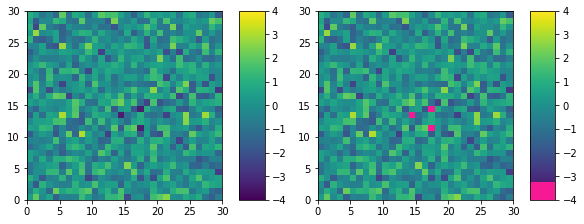

In [4]:
viridis = cm.get_cmap('viridis', 256)

newcolors = viridis(np.linspace(0, 1, 256))

pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

cms = [viridis, newcmp]

data = np.random.randn(30, 30)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
for ax, cmap in zip(axs, cms):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(psm, ax=ax)
plt.show()

## Make a new ramp as `LinearSegmentedColormap`

In [5]:
# Channel:  RED    GREEN     BLUE  ALPHA

red =   [100/256,   0/256,   0/256, 1.0]
white = [256/256, 256/256, 256/256, 1.0]
blue =  [  0/256,  50/256, 100/256, 1.0]

newcmp = LinearSegmentedColormap.from_list("foo", [red, white, blue])

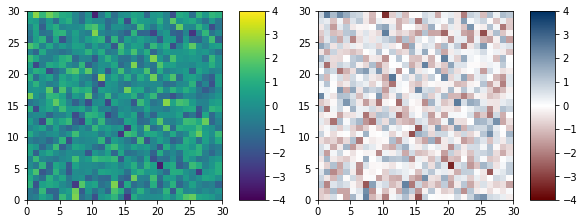

In [6]:
cms = [viridis, newcmp]

data = np.random.randn(30, 30)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
for ax, cmap in zip(axs, cms):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(psm, ax=ax)
plt.show()

Look up colours in a `LinearSegmentedColormap`...

In [7]:
newcmp(0.5)

(0.996078431372549, 0.996844362745098, 0.997610294117647, 1.0)

## Make a new ramp as `ListedColormap`

In [8]:
# Channel:  RED    GREEN     BLUE  ALPHA

red =   [100/256,   0/256,   0/256, 1.0]
white = [256/256, 256/256, 256/256, 1.0]
blue =  [  0/256,  50/256, 100/256, 1.0]

newcmp = LinearSegmentedColormap.from_list("foo", [red, white, blue])

newlst = ListedColormap(newcmp(np.linspace(0, 1, 16)))

In [9]:
newlst(0.5)

(0.9333333333333333, 0.9463541666666667, 0.959375, 1.0)

We can also get at the colours this way:

In [10]:
newlst.colors

array([[0.390625  , 0.        , 0.        , 1.        ],
       [0.471875  , 0.13333333, 0.13333333, 1.        ],
       [0.553125  , 0.26666667, 0.26666667, 1.        ],
       [0.634375  , 0.4       , 0.4       , 1.        ],
       [0.715625  , 0.53333333, 0.53333333, 1.        ],
       [0.796875  , 0.66666667, 0.66666667, 1.        ],
       [0.878125  , 0.8       , 0.8       , 1.        ],
       [0.959375  , 0.93333333, 0.93333333, 1.        ],
       [0.93333333, 0.94635417, 0.959375  , 1.        ],
       [0.8       , 0.8390625 , 0.878125  , 1.        ],
       [0.66666667, 0.73177083, 0.796875  , 1.        ],
       [0.53333333, 0.62447917, 0.715625  , 1.        ],
       [0.4       , 0.5171875 , 0.634375  , 1.        ],
       [0.26666667, 0.40989583, 0.553125  , 1.        ],
       [0.13333333, 0.30260417, 0.471875  , 1.        ],
       [0.        , 0.1953125 , 0.390625  , 1.        ]])

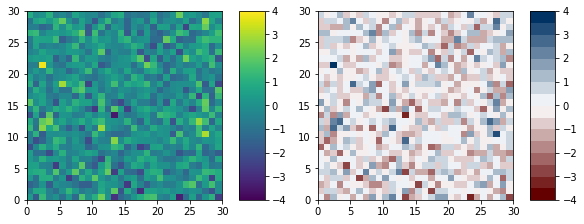

In [11]:
cms = [viridis, newlst]

data = np.random.randn(30, 30)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
for ax, cmap in zip(axs, cms):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(psm, ax=ax)
plt.show()

## Extract colours from an image

First, we'll need an image of the colourbar we want. It doesn't matter if it's horizontal or vertical (although you'll need to know which later.

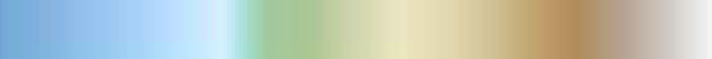

In [12]:
from PIL import Image

img = Image.open('../data/arcgis_cmap_horizontal.png')
img

Now we can get this as a NumPy array.

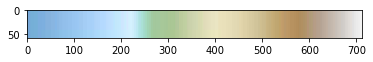

In [13]:
arr = np.asarray(img)[:, :, :3] / 255  # Remove alpha channel and rescale

plt.imshow(arr)

In [14]:
arr.shape

(59, 712, 3)

Now we want to extract colours from here. It's 712 pixels long; the easiest thing to do might be to just take every 3rd pixel.

In [15]:
colours = arr[0, ::3]  # First row, every third column.

In [16]:
arccmap = LinearSegmentedColormap.from_list("arccmap", colours)

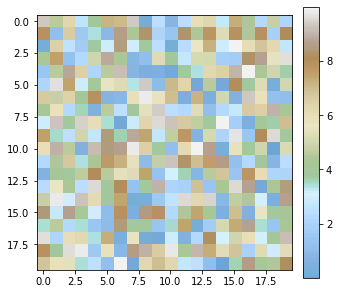

In [17]:
data = np.random.uniform(0, 10, (20, 20))

fig, ax = plt.subplots(figsize=(4.6, 4), constrained_layout=True)
psm = ax.imshow(data, cmap=arccmap)
fig.colorbar(psm, ax=ax)
plt.show()